
# Project: No Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, the data asscoiated with No Show Appointment will be analyzed.
**Project Context: _A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?_** 
>. In particular, the analysis goal is to find the factors affecting the patient to show up for a scheduled appointment. This will be accomplished by finding a co-relation between each variable or multiple variables with patient NO show up. The data involves the following: scheduled date, gender, age, scholarship (True or False indicates whether or not the patient is enrolled in brasilian welfare program), Neighborhood (indicated the location of the hospital), Hipertension (True or False), Diabetes (True or False), Alcoholism (True or False), Handcap (True or False) and SMS_received (indicated whether 1 or more messages sent to the patient).

In [1]:
# import numpy, pandas, matplotlib and seaborn packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, The data will be loaded, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# read the csv file and create a dataframe 
df= pd.read_csv('/kaggle/input/no-show-investigate-dataset/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Display the dimensions of the dataframe
df.shape

(110527, 14)

In [4]:
# Display the data type for each variable in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# show a describtive statistics for the variables in the data frame
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# check if there is duplicated data
sum(df.duplicated())

0

<a id='Cleaning'></a>
## Data Cleaning

> The data cleaning process involves the following based on the observation from the Data Wrangling section:
**_renaming the columns which contains underscore_**, **_replacing the values of Age variable having 0 value with 0.5 value_**, **_dropping the row of Age variable with -1 value_**, **_replacing the values of Handcap variable >1 with a value= 1 as handcap variable should be either True or False_**

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop the columns that will not be utilized in the analysis
df.drop(columns=['PatientId','AppointmentID','Neighbourhood'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [8]:
# rename the columns names which contains underscore, to facilitate using those names in analysis
df.rename(columns={'No-show':'Noshow', 'SMS_received':'SMSreceived'}, inplace=True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,Noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No


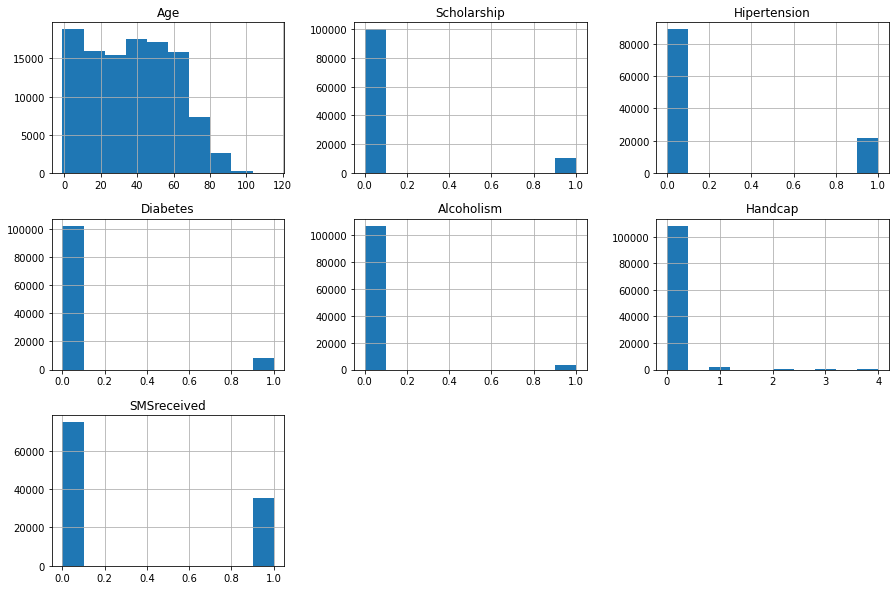

In [9]:
# create a histogram for all variable in dataframe
df.hist(figsize=(15,10));

In [10]:
# The describtive statistics shows the Age minimum value = -1. Dsiplay the rows with Age <0 
df.query('Age <= 0')

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,Noshow
59,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,0,No
63,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,0,No
64,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,1,No
65,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,0,No
67,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
110345,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,0,0,0,0,0,0,No
110346,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,0,0,0,0,0,0,No
110454,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,0,0,0,0,0,0,No
110460,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,0,0,0,0,0,0,No


In [11]:
# check the values and counts of Age variable. it seems the count of 0 Age close to the count of 1 year old.
# this could be infants with less than 1 year old. 
df.groupby('Age')['Noshow'].value_counts()

Age   Noshow
-1    No           1
 0    No        2900
      Yes        639
 1    No        1858
      Yes        415
                ... 
 99   No           1
 100  No           4
 102  No           2
 115  Yes          3
      No           2
Name: Noshow, Length: 204, dtype: int64

In [12]:
# The value of 0 Age will be changed with 0.5 (6 month) as the number of patients with 0 value who showup around 2900.
# hence this number con not be ignored.
df.Age = df['Age'].replace(df['Age'].value_counts().index[0],0.5)

In [13]:
# drop the row with Age value = -1
df.drop(index=df[df.Age < 0].index, axis=0, inplace=True)

In [14]:
# verify the values and counts of the Age variable after modification
df.groupby('Age')['Noshow'].value_counts()

Age    Noshow
0.5    No        2900
       Yes        639
1.0    No        1858
       Yes        415
2.0    No        1366
                 ... 
99.0   No           1
100.0  No           4
102.0  No           2
115.0  Yes          3
       No           2
Name: Noshow, Length: 203, dtype: int64

In [15]:
# display the dimensions of the df after removing the Age row with -1 value
df.shape

(110526, 11)

In [16]:
# display the counts of Handcap with showup/No showup condition. 
df.groupby('Handcap')['Noshow'].value_counts()

Handcap  Noshow
0        No        86373
         Yes       21912
1        No         1676
         Yes         366
2        No          146
         Yes          37
3        No           10
         Yes           3
4        No            2
         Yes           1
Name: Noshow, dtype: int64

>The counts of Handcap >1 is around 199.
 it can be either deleted from data set due to its small size compared to the dataset size. But it is prefered to keep it but change its value to be 1

In [17]:
# The describtive statistics shows Handcap max value =4, wheraas, it should be 0 or 1 (True or false). di
# Display the dataframe with handcap values > 1
df.query("Handcap > 1")

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,Noshow
946,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94.0,0,1,1,0,2,1,No
1665,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64.0,0,1,0,1,2,1,No
1666,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64.0,0,1,0,1,2,0,No
2071,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64.0,0,1,0,1,2,0,No
2091,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11.0,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...
108376,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44.0,0,1,1,0,2,1,No
109484,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64.0,0,1,1,0,2,0,No
109733,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34.0,0,0,0,0,2,1,No
109975,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39.0,1,0,0,0,2,1,No


In [18]:
# display the values for Handcap variable
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [19]:
# Replace the values of Handcap with values > 1 to 1
df.Handcap = df['Handcap'].replace(df['Handcap'].value_counts().index[2:],1)

In [20]:
# verify whether there are handcap values > 1
df.query("Handcap > 1")

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,Noshow


In [21]:
# show a describtive statistics for the variables after cleaning the data
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.105229,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029
std,23.084485,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874
min,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


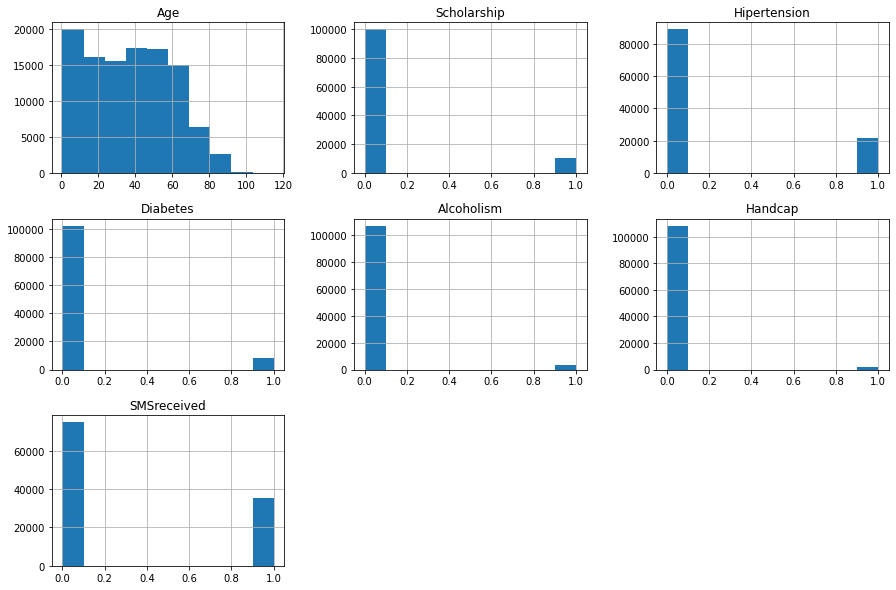

In [22]:
# create a histogram displaying the variables after data cleaning
df.hist(figsize=(15,10));

<a id='eda'></a>
## Exploratory Data Analysis

> Now the data is trimmed and cleaned, it is ready to move on to exploration. The data analysis process encompasses exploration of co-relation of each of the following variables with patients Not show conditions:
**_Gender, Scheduled day compared to appointmnet day, Age, Scholarship, Hypertension, Diabeties, Handcap and SMSreceived_**

**_Exploring the co-relation between each variable mentioned will be checked in two ways. First, check the impact of each variable considering ONLY NO Showup patients (in This case: the dataframe will be masked or filtered with the data of the patients who did not show up by creating new dataframe df1). Second, proportion between show and Not show for all the variable has been untilized._**

In [23]:
# create dataframe df1 with the patients who did not show up in the appointment
df1 = df[df['Noshow'] == 'Yes']
df1

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,Noshow
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23.0,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39.0,0,0,0,0,0,0,Yes
11,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29.0,0,0,0,0,0,1,Yes
17,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40.0,1,0,0,0,0,0,Yes
20,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30.0,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
110484,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45.0,0,0,0,0,0,0,Yes
110492,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33.0,0,1,0,0,0,0,Yes
110496,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37.0,0,1,0,0,0,0,Yes
110515,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33.0,0,1,0,0,0,0,Yes


In [24]:
# display a decsribtive statistics for df1
df1.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,34.331982,0.115507,0.169004,0.064071,0.030333,0.018236,0.438371
std,21.943722,0.319640,0.374764,0.244885,0.171505,0.133805,0.496198
min,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


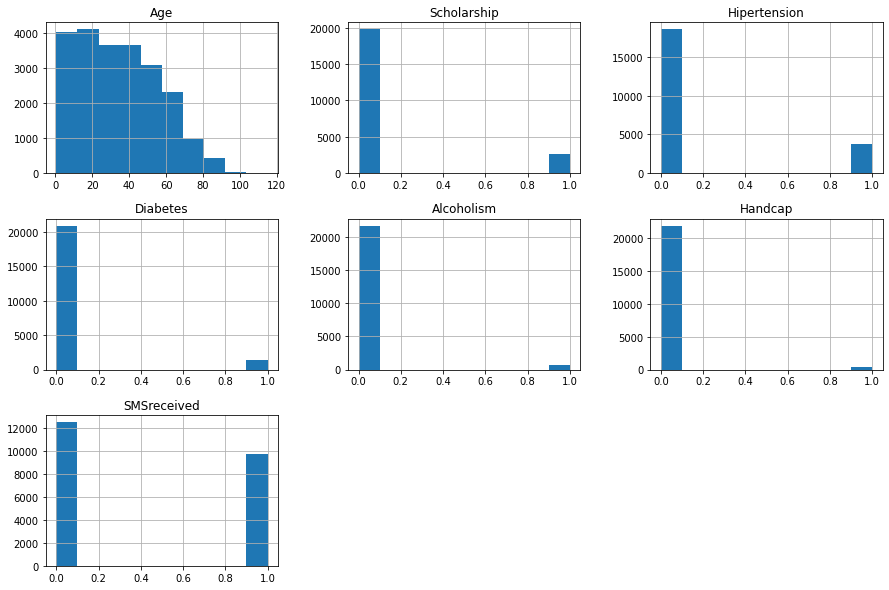

In [25]:
# create a histogram plot for all the variables
df1.hist(figsize=(15,10));

###  Q1. Does Scholarship has co-relation with No show of the patients?

In [26]:
# check the counts of No Showup patients in accord to scholarship condition
df1.Scholarship.value_counts()

0    19741
1     2578
Name: Scholarship, dtype: int64

In [27]:
# calculate the percentage of pateint whos Do not have scholarship and did not show in the appointment
No_scholarship = df1.Scholarship.value_counts()[0]/(df1.Scholarship.value_counts()[0]+df1.Scholarship.value_counts()[1])
No_scholarship

0.8844930328419732

**_Note: It can be conculded that 88.4% of the pateints who did not show in the appointment Do NOt have a scholarship.
This is considered a major factor of Not showing up of the patients._**

#### Let's check the proportion between the patient who show up /did not show up with different scholarship condition

In [28]:
# Create Masks for the patients who show up and for the patients who did not show up.
show = df['Noshow'] == 'No'
Noshow = df['Noshow'] == 'Yes'

In [29]:
# check the number of patients who show versus the number of patients who did not show.
# it shown that almost 20% of the patients did NOT show up in accord to the appointment
show.value_counts()

True     88207
False    22319
Name: Noshow, dtype: int64

> Around 20% of patients did NOT show up to the appointment

In [30]:
# group the data with Scholarship conditions and No Show and showup condition.
# Note : dataframe df is utilized as it contains the whole cleaned data without filtering or masking
df.groupby('Scholarship')['Noshow'].value_counts()

Scholarship  Noshow
0            No        79924
             Yes       19741
1            No         8283
             Yes        2578
Name: Noshow, dtype: int64

In [31]:
# group the data with Scholarship conditions and No Show and showup condition.
df.Scholarship[Noshow]

6         0
7         0
11        0
17        1
20        0
         ..
110484    0
110492    0
110496    0
110515    0
110516    0
Name: Scholarship, Length: 22319, dtype: int64

## create a function for histogram plot

In [32]:
def histfunc(df, column_name, xlabel, ylabel, title):
    try:
        df[column_name][Noshow].hist(alpha=0.5, bins=10, color= 'red', label='NoShow')
        df[column_name][show].hist(alpha=0.5, bins=10, color= 'blue', label='Show')
    except:
        sns.countplot(data=df, x=column_name, hue='Noshow')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show();

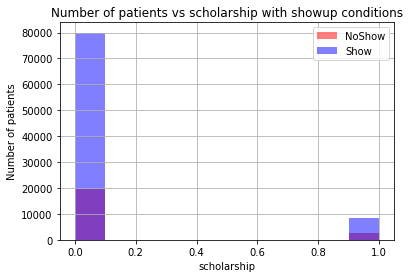

In [33]:
# create a histogram between scholarship and number of patients with show/No show conditions
histfunc(df, 'Scholarship','scholarship', 'Number of patients','Number of patients vs scholarship with showup conditions')

In [34]:
# calculate the proportion of patients Who did NOT show up and who DID NOT have a scholarship
Noscholarship_proportion = df.groupby('Scholarship')['Noshow'].value_counts()[0][1]/(df.groupby('Scholarship')['Noshow'].value_counts()[0][1]+df.groupby('Scholarship')['Noshow'].value_counts()[0][0])
Noscholarship_proportion

0.19807354638037425

> Around 19.8% of patients who do not have a Scholarship, did NOT show up in the appointment

In [35]:
# calculate the proportion of patients Who did NOT show up and who are having a scholarship
scholarship_proportion = df.groupby('Scholarship')['Noshow'].value_counts()[1][1]/(df.groupby('Scholarship')['Noshow'].value_counts()[1][1]+df.groupby('Scholarship')['Noshow'].value_counts()[1][0])
scholarship_proportion

0.2373630420771568

> Around 23.7% of patients who are having scholarship, did NOT show up in the appointment. 
**It can be concluded that if proportion is considered, scholarship will not have siginifacnt impact on patients No show condition**

### **__It is obevious that scholarship is a major factor of not showing up of the patients as it represents 88.4% out of the total number of patients who did not showup in the appointment__**

###  Q2. Does SMS variable has co-relation with No show of the patients?

In [36]:
# check the counts of No Showup patients in accord to SMSreceived condition
df1.SMSreceived.value_counts()

0    12535
1     9784
Name: SMSreceived, dtype: int64

In [37]:
# calculate the percentage of pateint whos Do not have scholarship and did not show in the appointment
No_SMSreceived = df1.SMSreceived.value_counts()[0]/(df1.SMSreceived.value_counts()[0]+df1.SMSreceived.value_counts()[1])
No_SMSreceived

0.5616291052466509

**_Note: It can be concluded that 56.16% of the pateints who did not show in the appointment Did not receive an SMS.
This is considered a additional strong factor of Not showing up of the patients._**

#### Let's check the proportion between the patient who show up /did not show up with different SMS received condition

In [38]:
#group the data with SMS received and No Show condition.
# Note : dataframe df is utilized as it contains the whole cleaned data without filtering or masking
df.groupby('SMSreceived')['Noshow'].value_counts()

SMSreceived  Noshow
0            No        62509
             Yes       12535
1            No        25698
             Yes        9784
Name: Noshow, dtype: int64

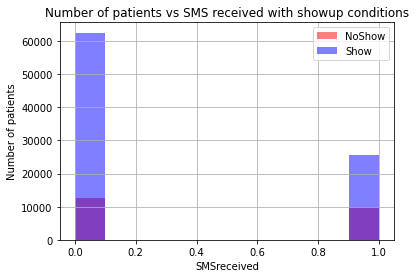

In [39]:
# create a histogram between SMS Received and number of patients with show/No show conditions
histfunc(df, 'SMSreceived','SMSreceived', 'Number of patients','Number of patients vs SMS received with showup conditions')

In [40]:
# calculate the proportion of patients Who did NOT show up and who DID NOT recieve an SMS
NoSMS_proportion = df.groupby('SMSreceived')['Noshow'].value_counts()[0][1]/(df.groupby('SMSreceived')['Noshow'].value_counts()[0][0]+df.groupby('SMSreceived')['Noshow'].value_counts()[0][1])
NoSMS_proportion

0.16703533926762965

> Around 16.7% of patients who did not recieve an SMS, did NOT show up in the appointment

In [41]:
# calculate the proportion of patients Who did NOT show up and who DID NOT recieve an SMS
SMS_proportion = df.groupby('SMSreceived')['Noshow'].value_counts()[1][1]/(df.groupby('SMSreceived')['Noshow'].value_counts()[1][0]+df.groupby('SMSreceived')['Noshow'].value_counts()[1][1])
SMS_proportion

0.27574544839637

> Around 27.5% of patients who received an SMS, did NOT show up in the appointment. **It can be concluded that if proportion is considered, SMS variable will not have an impact on number of patients who did not show up.**

### **__It is obevious that Not receiving an SMS is additional major factor of not showing up of the patients as it represents 56.1% out of the total number of patients who did not showup in the appointment__**

### Q3. Does SMS and Scholarship variables have an impact on Not show of the patients?

In [42]:
# group the data by scholarship and SMS received
df1.groupby('Scholarship')['SMSreceived'].value_counts()

Scholarship  SMSreceived
0            0              11141
             1               8600
1            0               1394
             1               1184
Name: SMSreceived, dtype: int64

In [43]:
#calculate the percentage of patients who didnot receive SMS and do not have a scholarship
df1.groupby('Scholarship')['SMSreceived'].value_counts()[0][0]/df1.shape[0]

0.49917110981674806

### **_it can be concluded that almost 50% of the patients who did not receive an SMS and do not have scholarship , did not show up in the appointment._**

### Q4. Does Hipertension variable has an impact on Not show of the patients?

In [44]:
# check the counts of No Showup patients who has Hipertension
df1.Hipertension.value_counts()

0    18547
1     3772
Name: Hipertension, dtype: int64

In [45]:
# calculate the percentage of pateint whos Do not have Hipertension and did not show in the appointment
Hipertension = df1.Hipertension.value_counts()[1]/(df1.Hipertension.value_counts()[0]+df1.Hipertension.value_counts()[1])
Hipertension

0.16900398763385457

**_Note: Around 17% of the pateints who did not show in the appointment suffers from hipertension.
Hipertension is a moderate factor of Not showing up of the patients._**

#### Let's check the proportion between the patient who show up /did not show up with different Hipertension condition

In [46]:
# group the data with Hipertension conditions and No Show condition.
df.groupby('Hipertension')['Noshow'].value_counts()

Hipertension  Noshow
0             No        70178
              Yes       18547
1             No        18029
              Yes        3772
Name: Noshow, dtype: int64

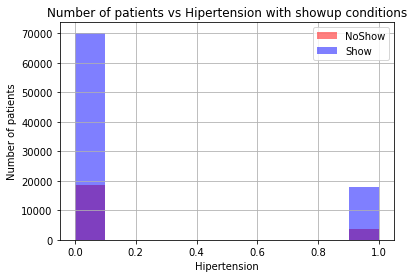

In [47]:
# create a histogram between Hipertension and number of patients with show/No show conditions
histfunc(df, 'Hipertension','Hipertension', 'Number of patients','Number of patients vs Hipertension with showup conditions')

In [48]:
# calculate the proportion of patients Who did NOT show up and who DID NOT have a Hipertension
NoHipertension_proportion = df.groupby('Hipertension')['Noshow'].value_counts()[0][1]/(df.groupby('Hipertension')['Noshow'].value_counts()[0][1]+df.groupby('Hipertension')['Noshow'].value_counts()[0][0])
NoHipertension_proportion

0.2090391659622429

> Around 21% of patients who do not have a Hipertension, did NOT show up in the appointment

In [49]:
# calculate the proportion of patients Who did NOT show up and who are having a Hipertension
Hipertension_proportion = df.groupby('Hipertension')['Noshow'].value_counts()[1][1]/(df.groupby('Hipertension')['Noshow'].value_counts()[1][1]+df.groupby('Hipertension')['Noshow'].value_counts()[1][0])
Hipertension_proportion

0.17301958625751113

> Around 17.3% of patients who are having Hipertension, did NOT show up in the appointment. **It can be concluded that if proportion is considered, Hypertension variable have no impact on number of patients who did not show up.**

### **_Hipertension has a moderate impact of patients who did not show up in the appointment as it represents 17% out of all the patients who did not show up in the appointment._**

### Q5. Does Diabetes variable has an impact on Not show of the patients?

In [50]:
# check the counts of No Showup patients who has Diabetes
df1.Diabetes.value_counts()

0    20889
1     1430
Name: Diabetes, dtype: int64

In [51]:
# calculate the percentage of pateint whos Do not have Diabetes and did not show in the appointment
Diabetes = df1.Diabetes.value_counts()[1]/(df1.Diabetes.value_counts()[0]+df1.Diabetes.value_counts()[1])
Diabetes

0.06407097092163627

**_Only 6.4% of the pateints who did not show in the appointment suffers from Diabetes.
Diabetes is a minor factor of Not showing up of the patients._**

#### Let's check the proportion between the patient who show up /did not show up with different Diabetes condition

In [52]:
# group the data with Diabetes conditions and No Show condition.
df.groupby('Diabetes')['Noshow'].value_counts()

Diabetes  Noshow
0         No        81694
          Yes       20889
1         No         6513
          Yes        1430
Name: Noshow, dtype: int64

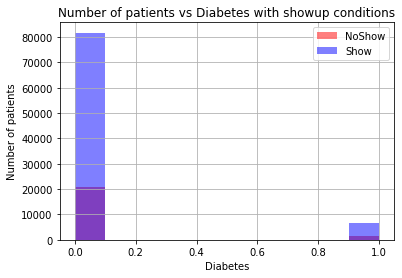

In [53]:
# create a histogram between Diabetes and number of patients with show/No show conditions
histfunc(df, 'Diabetes','Diabetes', 'Number of patients','Number of patients vs Diabetes with showup conditions')

In [54]:
# calculate the proportion of patients Who did NOT show up and who DID NOT have a Diabetes
NoDiabetes_proportion = df.groupby('Diabetes')['Noshow'].value_counts()[0][1]/(df.groupby('Diabetes')['Noshow'].value_counts()[0][1]+df.groupby('Diabetes')['Noshow'].value_counts()[0][0])
NoDiabetes_proportion

0.20363023112991432

> Around 20% of patients who do not have a Diabetes, did NOT show up in the appointment

In [55]:
# calculate the proportion of patients Who did NOT show up and who are having a Diabetes
Diabetes_proportion = df.groupby('Diabetes')['Noshow'].value_counts()[1][1]/(df.groupby('Diabetes')['Noshow'].value_counts()[1][1]+df.groupby('Diabetes')['Noshow'].value_counts()[1][0])
Diabetes_proportion

0.18003273322422259

> Around 18% of patients who are having Diabetes, did NOT show up in the appointment. **It can be concluded that if proportion is considered, Diabetes variable do not have an impact on number of patients who did not show up.**

### **_Diabetes has a minor impact of patients who did not show up in the appointment as it represents 6.4% out of all the patients who did not show up in the appointment._**

### Q6. Does Alcoholism variable has an impact on Not show of the patients?

In [56]:
# check the counts of No Showup patients who has Alcoholism
df1.Alcoholism.value_counts()

0    21642
1      677
Name: Alcoholism, dtype: int64

In [57]:
# calculate the percentage of pateint whos Do not have Alcoholism and did not show in the appointment
Alcoholism = df1.Alcoholism.value_counts()[1]/(df1.Alcoholism.value_counts()[0]+df1.Alcoholism.value_counts()[1])
Alcoholism

0.030332900219543886

**_Only 3% of the pateints who did not show in the appointment suffers from Alcoholism.
Alcoholism is a very minor factor of Not showing up of the patients._**

#### Let's check the proportion between the patient who show up /did not show up with different Alcoholism condition

In [58]:
# group the data with Alcoholism conditions and No Show condition.
df.groupby('Alcoholism')['Noshow'].value_counts()

Alcoholism  Noshow
0           No        85524
            Yes       21642
1           No         2683
            Yes         677
Name: Noshow, dtype: int64

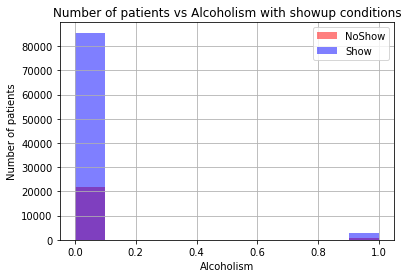

In [59]:
# create a histogram between Alcolholism and number of patients with show/No show conditions
histfunc(df, 'Alcoholism','Alcoholism', 'Number of patients','Number of patients vs Alcoholism with showup conditions')

In [60]:
# calculate the proportion of patients Who did NOT show up and who DID NOT have a Alcoholism
NoAlcoholism_proportion = df.groupby('Alcoholism')['Noshow'].value_counts()[0][1]/(df.groupby('Alcoholism')['Noshow'].value_counts()[0][1]+df.groupby('Alcoholism')['Noshow'].value_counts()[0][0])
NoAlcoholism_proportion

0.20194837915010358

> Around 20% of patients who do not have a Alcoholism, did NOT show up in the appointment

In [61]:
# calculate the proportion of patients Who did NOT show up and who are having a Alcoholism
Alcoholism_proportion = df.groupby('Alcoholism')['Noshow'].value_counts()[1][1]/(df.groupby('Alcoholism')['Noshow'].value_counts()[1][1]+df.groupby('Alcoholism')['Noshow'].value_counts()[1][0])
Alcoholism_proportion

0.20148809523809524

> Around 20% of patients who are having Alcoholism, did NOT show up in the appointment. **It can be concluded that if proportion is considerd, Alcoholism variable do not have an impact on number of patients who did not show up.**

### **Alcoholism has a very small impact impact of patients who did not show up in the appointment as it represents 3% only out of all the patients who did not show up in the appointment._**

### Q7. Does Handcap variable has an impact on Not show of the patients?

In [62]:
# check the counts of No Showup patients who has Handcap
df1.Handcap.value_counts()

0    21912
1      407
Name: Handcap, dtype: int64

In [63]:
# calculate the percentage of pateint whos Do not have Handcap and did not show in the appointment
Handcap = df1.Handcap.value_counts()[1]/(df1.Handcap.value_counts()[0]+df1.Handcap.value_counts()[1])
Handcap

0.018235584031542632

**_Only 1.8% of the pateints who did not show in the appointment suffers from Handcap.
Handcap is a very minor factor of Not showing up of the patients._**

#### Let's check the proportion between the patient who show up /did not show up with different Handcap condition

In [64]:
# groyp the data with Handcap conditions and No Show condition.
df.groupby('Handcap')['Noshow'].value_counts()

Handcap  Noshow
0        No        86373
         Yes       21912
1        No         1834
         Yes         407
Name: Noshow, dtype: int64

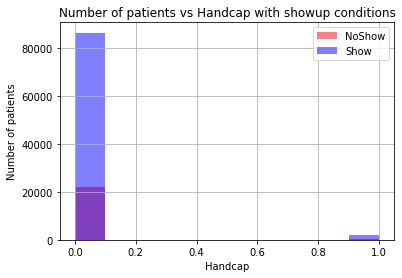

In [65]:
# create a histogram between Handcap and number of patients with show/No show conditions
histfunc(df, 'Handcap','Handcap', 'Number of patients','Number of patients vs Handcap with showup conditions')

In [66]:
# calculate the proportion of patients Who did NOT show up and who DID NOT have a Handcap
NoHandcap_proportion = df.groupby('Handcap')['Noshow'].value_counts()[0][1]/(df.groupby('Handcap')['Noshow'].value_counts()[0][1]+df.groupby('Handcap')['Noshow'].value_counts()[0][0])
NoHandcap_proportion

0.20235489680011082

> Around 20% of patients who do not have a Handcap, did NOT show up in the appointment

In [67]:
# calculate the proportion of patients Who did NOT show up and who are having a Handcap
Handcap_proportion = df.groupby('Handcap')['Noshow'].value_counts()[1][1]/(df.groupby('Handcap')['Noshow'].value_counts()[1][1]+df.groupby('Handcap')['Noshow'].value_counts()[1][0])
Handcap_proportion

0.18161535029004908

> Around 18% of patients who are having Handcap, did NOT show up in the appointment. **It can be concluded that if proportion is considered, Handcap variable do not have an impact on number of patients who did not show up.**

### **Handcap has a very small impact impact of patients who did not show up in the appointment as it represents 1.8% only out of all the patients who did not show up in the appointment._**

### Q8. check Gender variable has an impact on Not show of the patients?

In [68]:
# check the counts of No Showup patients with respect to gender
df1.Gender.value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [69]:
# calculate the percentage of Female patients and did not show in the appointment
Female = df1.Gender.value_counts()[0]/(df1.Gender.value_counts()[0]+df1.Gender.value_counts()[1])
Female

0.653882342398853

In [70]:
# calculate the percentage of Male patients and did not show in the appointment
Male = df1.Gender.value_counts()[1]/(df1.Gender.value_counts()[0]+df1.Gender.value_counts()[1])
Male

0.346117657601147

**_It is clearly shown that More number of Females than males did not show up, the number of females are almost double the number of males. Females represent 65.3% of all the patients who did not show up in the appointment. Gender has an impact of not showing up of the patients._**

#### Let's check the proportion between the patient who show up /did not show up with different Handcap condition

In [71]:
# check the total number of Female and Males in the Dataframe.
# Its obeviously shown that there are more Females than male
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [72]:
# Group the data by gender and patients show conditions
# Note: No: means show up, Yes: means NO Show up
df.groupby('Gender')['Noshow'].value_counts()

Gender  Noshow
F       No        57245
        Yes       14594
M       No        30962
        Yes        7725
Name: Noshow, dtype: int64

,Noshow
Gender,
F,71839
M,38687


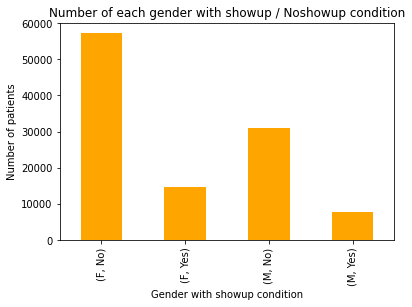

In [73]:
# bar plot shows gender and patients show conditions
# Note: No: means show up, Yes: means NO Show u
df.groupby('Gender').Noshow.value_counts().plot(kind='bar', color='orange');
plt.title('Number of each gender with showup / Noshowup condition')
plt.xlabel('Gender with showup condition')
plt.ylabel('Number of patients');
df.groupby(['Gender'])[['Noshow']].count()

> The above bar plot shows that almost the same proportion of Males and females with showup(NO) Versus No showup(yes).
> Let's verify this by calculating the proportion of each gender. This is accomplished by dividing each gender at each showup condition by total number of genders.

In [74]:
# The count of patients who showup in each gender
df.Gender[show].value_counts()

F    57245
M    30962
Name: Gender, dtype: int64

In [75]:
# The count of patiemts who DID NOT showup in each gender
df.Gender[Noshow].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [76]:
# let's calculate the proprtion of Females who showup compared to Females who did NOT showup
Female_proportion = df.Gender[show].value_counts()[0]/df.Gender[Noshow].value_counts()[0]
Female_proportion

3.9225023982458547

In [77]:
# let's calculate the proprtion of Males who showup compared to males who did NOT showup
Male_proportion = df.Gender[show].value_counts()[1]/df.Gender[Noshow].value_counts()[1]
Male_proportion

4.008025889967637

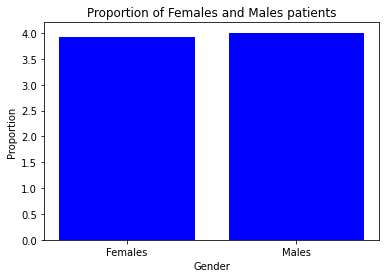

In [78]:
# create a bar chart showing Females and Males proportion who showup with compared to who did NOT showup 
plt.bar(['Females', 'Males'],[Female_proportion,Male_proportion], color='blue')
plt.title('Proportion of Females and Males patients')
plt.xlabel('Gender')
plt.ylabel('Proportion');

> **_From the bar chart above, it clearly shows the proportion for each of the Females and males who showup compared to the ones who did NOT showup are almost the same.
Hence, if proportion is considered, Gender variable do not have an impact on patients who DID NOT showup in the appointment._**

### **Gender has a large impact of patients who did not show up in the appointment as Females represents 65.3% out of the all patients who did not showup in the appointment._**

>**Scheduled day : is the day someone called or registered the appointment, this is before appointment of course.
Appointment day: is the day of the actual appointment.**
The data will be checked accordingly.If some data shows that scheduled day is after the appointment day, does this has a co-relation with the patients Not show conditions?

In [79]:
# Check the total counts of appointment day after the schedule day
df1.query("ScheduledDay < AppointmentDay").value_counts().sum()

20522

In [80]:
# check the total count of appointment day before the schedule day (oddity)
df1.query("ScheduledDay >= AppointmentDay").value_counts().sum()

1797

In [81]:
# Check the total counts of appointment day after the schedule day
df.query("ScheduledDay < AppointmentDay").value_counts().sum()

71959

In [82]:
# check the total count of appointment day before the schedule day (oddity)
df.query("ScheduledDay >= AppointmentDay").value_counts().sum()

38567

In [83]:
df.query("ScheduledDay >= AppointmentDay").value_counts()

Gender  ScheduledDay          AppointmentDay        Age   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMSreceived  Noshow
M       2016-05-10T08:18:24Z  2016-05-10T00:00:00Z  16.0  0            0             0         0           0        0            Yes       4
        2016-05-11T10:23:09Z  2016-05-11T00:00:00Z  10.0  0            0             0         0           0        0            Yes       3
        2016-06-07T16:15:14Z  2016-06-07T00:00:00Z  16.0  0            0             0         0           0        0            Yes       3
        2016-05-06T15:31:47Z  2016-05-06T00:00:00Z  14.0  0            0             0         0           0        0            No        3
F       2016-06-07T18:44:19Z  2016-06-07T00:00:00Z  60.0  0            0             0         0           0        0            No        3
                                                                                                                                          ..
        2016-05-19

In [84]:
# check if appointment day is before the schedule day, which will be utilized in the analysis
wrong_appointment_day = df.query("ScheduledDay >= AppointmentDay")['Noshow'].value_counts()
wrong_appointment_day

No     36770
Yes     1797
Name: Noshow, dtype: int64

In [85]:
# check if the appointment day is after the schedule day
correct_appointment_day = df.query("ScheduledDay < AppointmentDay")['Noshow'].value_counts()
correct_appointment_day

No     51437
Yes    20522
Name: Noshow, dtype: int64

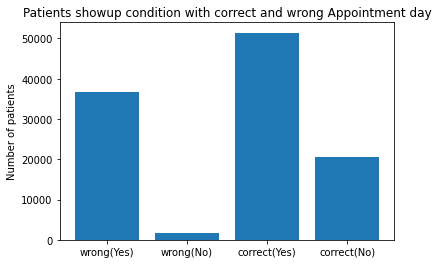

In [86]:
# create a bar plot showing showup conditions with correct and wrong appointment day
plt.bar(['wrong(Yes)', 'wrong(No)', 'correct(Yes)', 'correct(No)'],[wrong_appointment_day[0],wrong_appointment_day[1],correct_appointment_day[0], correct_appointment_day[1]])
plt.title('Patients showup condition with correct and wrong Appointment day')
plt.ylabel('Number of patients');

> The count of data with an oddity in appointment or scheduled day (Appointment day shown after the scheduled day) is around 35% of the whole data. Additionally, the count of patients who did Not show up at wrong appointment or scheduled day shows 1797 (which represents 8% of the total number of patients who did Not show up).
From the plot above, so there is no co-relation between oddity in sceduled day lead to the patients show up condition.
Another point to ponder is to check if there is a relation between appointment/scheduled day and SMS recieved variable, Does the patient receives any message if there is a change required in the appointment day?

In [87]:
# check the counts of patients who received an SMS and apointment day after the schedule day
df1.query("ScheduledDay >= AppointmentDay")['SMSreceived'].value_counts()

0    1797
Name: SMSreceived, dtype: int64

In [88]:
# check the counts of patients who received an SMS and apointmnet day before the schedule day
df1.query("ScheduledDay < AppointmentDay")['SMSreceived'].value_counts()

0    10738
1     9784
Name: SMSreceived, dtype: int64

> it is noticed that none of the patients with ODDITY in appointment day receives an SMS. 

### **Oddity in appointment day has no impact of patients who did not show up in the appointment._**

### Q8. Does Age variable has co-relation with patients who did not showup?

In [89]:
# Display counts of patients who show up in the appointmnet according to their age
df1.Age.value_counts()

0.5      639
1.0      415
17.0     396
19.0     394
30.0     369
        ... 
95.0       6
115.0      3
97.0       2
98.0       1
96.0       1
Name: Age, Length: 100, dtype: int64

In [90]:
# calculate the mean age of patients who show up in the appointment
df.groupby('Noshow').Age.mean()

Noshow
No     37.806943
Yes    34.331982
Name: Age, dtype: float64

In [91]:
# calculate the mean age of patients who show up in the appointment
df.groupby('Noshow').Age.value_counts()

Noshow  Age  
No      0.5      2900
        1.0      1858
        52.0     1449
        56.0     1372
        2.0      1366
                 ... 
Yes     95.0        6
        115.0       3
        97.0        2
        96.0        1
        98.0        1
Name: Age, Length: 203, dtype: int64

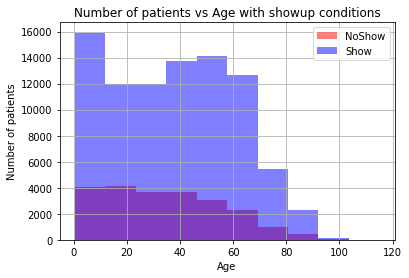

In [92]:
# create a histogram between Age and number of patients with show/No show conditions
histfunc(df, 'Age','Age', 'Number of patients','Number of patients vs Age with showup conditions')

**_The above plot shows NO co-relation between age and Number of patients who did not show up._**

<a id='conclusions'></a>
## Conclusions

> The Analysis above shows that there are mutiple strong factors contributing to the patients of not Showing up in the appointment such as Scholarship representing 88.4%, SMSreceived representing 56.4%, Female Gender representing 65%, and Hipertension representing 17%. In addition to various minor factors like Diabetes representing 6.4%, Alcoholism representing 3% and Handcap representing 1.8%. Whereas, Age variable and the oddity in appointment day in the datset does not have an impact on the number of patients who did not show in the appointment.
The are two limitations faced in the analysis report as following: correcting the oddity in the appointment day without basis. Furthermore, the Handcap variable with mutiple values other than 0 and 1 such as 2,3 and 4 value (total 199 rows) are all replaced to a value 1 ,but it can be either removed as it represent 0.18% of all the size of the data or keep it.
Additional Limitation is i could not make use of Neighborhood variable provided without information about patient location which would be useful in calculating the distance between the patient location and the appointment location to check its impact on the patient No show to the appointment.